In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'DOH COVID Data Drop_ 20201023 - 04 Case Information.csv')
data = data.sample(5000)

In [3]:
data.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [4]:
data

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
49203,C462024,48.0,45 to 49,FEMALE,2020-08-25,2020-08-27,2020-08-29,NaN,2020-09-04,RECOVERED,...,DAVAO DEL SUR,DAVAO CITY,PH112402000,NaN,NaN,RECOVERED,NO,NaN,NO,NaN
267561,C499313,19.0,15 to 19,MALE,2020-06-30,2020-07-04,2020-07-06,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
241464,C990900,28.0,25 to 29,MALE,NaN,NaN,2020-08-04,NaN,NaN,RECOVERED,...,NCR,CITY OF PARAÑAQUE,PH137604000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
80292,C321456,87.0,80+,MALE,NaN,2020-08-12,2020-08-14,NaN,2020-07-26,RECOVERED,...,NCR,CITY OF VALENZUELA,PH137504000,NaN,NaN,RECOVERED,NO,NaN,NaN,NaN
223692,C122074,31.0,30 to 34,MALE,2020-04-08,2020-06-08,2020-08-09,NaN,NaN,RECOVERED,...,LAGUNA,CITY OF CALAMBA,PH043405000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275696,C426509,29.0,25 to 29,FEMALE,2020-06-02,2020-06-07,2020-06-09,NaN,2020-07-08,RECOVERED,...,CEBU,CEBU CITY (CAPITAL),PH072217000,NaN,NaN,RECOVERED,NO,2020-06-02,NO,NaN
146715,C983520,15.0,15 to 19,FEMALE,2020-10-17,2020-10-19,2020-10-21,NaN,NaN,NaN,...,RIZAL,ANGONO,PH045801000,MAHABANG PARANG,PH045801014,MILD,NO,NaN,NO,NaN
68407,C310250,22.0,20 to 24,FEMALE,2020-05-28,2020-05-30,2020-06-01,NaN,NaN,RECOVERED,...,NCR,QUEZON CITY,PH137404000,NaN,NaN,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
234428,C586298,16.0,15 to 19,MALE,2020-07-27,2020-07-29,2020-08-02,NaN,NaN,RECOVERED,...,NCR,QUEZON CITY,PH137404000,NaN,NaN,RECOVERED,NO,2020-07-22,NaN,"Health Status is ""Recovered"", but no Date Reco..."


In [29]:
#TODO: DATA CLEANING - DATE SPECIMEN DROPPING = 1 MONTH (using DateSpecimen col)

df = data.drop(data.loc[:, 'CaseCode':'Age'].columns, axis=1)
df = df.drop(df.loc[:, 'Sex':'ProvRes'].columns, axis=1)
df = df.drop(df.loc[:, 'CityMuniPSGC':'BarangayPSGC'].columns, axis=1)
df = df.drop(df.loc[:, 'DateOnset':'ValidationStatus'].columns, axis=1)
df

,AgeGroup,CityMunRes,HealthStatus,Quarantined
49203,45 to 49,DAVAO CITY,RECOVERED,NO
267561,15 to 19,NaN,RECOVERED,NO
241464,25 to 29,CITY OF PARAÑAQUE,RECOVERED,NO
80292,80+,CITY OF VALENZUELA,RECOVERED,NO
223692,30 to 34,CITY OF CALAMBA,RECOVERED,NO
...,...,...,...,...
275696,25 to 29,CEBU CITY (CAPITAL),RECOVERED,NO
146715,15 to 19,ANGONO,MILD,NO
68407,20 to 24,QUEZON CITY,RECOVERED,NO
234428,15 to 19,QUEZON CITY,RECOVERED,NO


In [30]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,AgeGroup,CityMunRes,HealthStatus,Quarantined
0,45 to 49,DAVAO CITY,RECOVERED,NO
1,25 to 29,CITY OF PARAÑAQUE,RECOVERED,NO
2,80+,CITY OF VALENZUELA,RECOVERED,NO
3,30 to 34,CITY OF CALAMBA,RECOVERED,NO
4,20 to 24,SALVADOR,RECOVERED,YES
...,...,...,...,...
4473,25 to 29,CEBU CITY (CAPITAL),RECOVERED,NO
4474,15 to 19,ANGONO,MILD,NO
4475,20 to 24,QUEZON CITY,RECOVERED,NO
4476,15 to 19,QUEZON CITY,RECOVERED,NO


In [7]:
unique = df['CityMunRes'].unique().tolist()
uniAgeG = df['AgeGroup'].unique().tolist()
uniHealth = df['HealthStatus'].unique().tolist()

In [8]:
for i in range(len(df)):
    for j in unique:
        if df['CityMunRes'][i] == j:
            df['CityMunRes'][i] = unique.index(j)
    
    for k in uniAgeG:
        if df['AgeGroup'][i] == k:
            df['AgeGroup'][i] = uniAgeG.index(k)

    for l in uniHealth:
        if df['HealthStatus'][i] == l:
            df['HealthStatus'][i] = uniHealth.index(l)

In [9]:
df

,AgeGroup,CityMunRes,HealthStatus,Quarantined
0,0,0,0,NO
1,1,1,0,NO
2,2,2,0,NO
3,3,3,0,NO
4,4,4,0,YES
...,...,...,...,...
4473,1,30,0,NO
4474,9,125,2,NO
4475,4,6,0,NO
4476,9,6,0,NO


In [10]:
column = df.loc[:,'AgeGroup':'CityMunRes'].columns.to_list() # SUBJECT TO CHANGE
x = df[column].astype('int')
y = df['HealthStatus'].astype('int')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
logreg = LogisticRegression()

In [13]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred = logreg.predict(x_test)

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[754,   0,   1,   0,   0,   0],
       [ 15,   0,   0,   0,   0,   0],
       [105,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0]], dtype=int64)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       755
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00       105
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         5

    accuracy                           0.84       896
   macro avg       0.14      0.17      0.15       896
weighted avg       0.71      0.84      0.77       896



In [17]:
import seaborn as sns

In [23]:
uniHealth

['RECOVERED', 'DIED', 'MILD', 'ASYMPTOMATIC', 'CRITICAL', 'SEVERE']

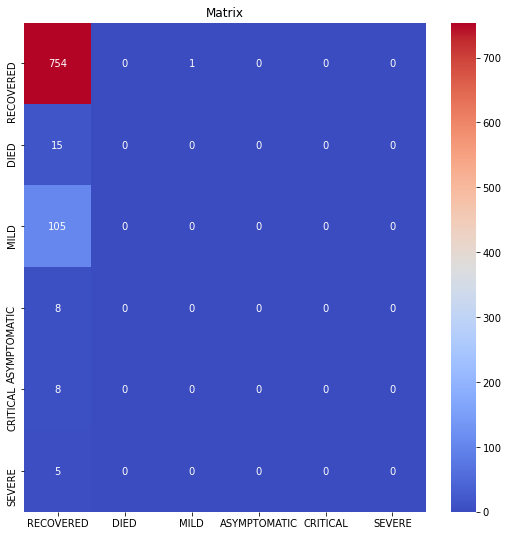

In [28]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="coolwarm",fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels([uniHealth[0],uniHealth[1],uniHealth[2],uniHealth[3],uniHealth[4],uniHealth[5]])
ax.set_yticklabels([uniHealth[0],uniHealth[1],uniHealth[2],uniHealth[3],uniHealth[4],uniHealth[5]])
plt.title('Matrix')
plt.show()